# Photonic Crystals Data Analysis
## ENPH 453 Advanced Physics Lab Course
### Genevieve Hayes
### Partner: Astral Cai

#### Started: Feb 11, 2021
#### Updated: Mar 13, 2021

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import qexpy as q
import os

# VCO Frequency Calibration

In [69]:
# Calibration data

f_VCO1 = np.array([51.570, 51.882, 52.343, 52.962, 53.591, 54.193, 54.775, 55.342,55.915,56.515,57.236,58.091,58.947,59.792,
60.631,61.465,62.290,63.121,63.953,64.786,65.620,66.457,67.299,68.145,68.998,69.852,70.716,71.587,72.463,73.34,74.234,
75.127,76.025,76.925,77.821,78.728,79.640,80.554,81.468,82.387,83.312,84.242,85.168,86.103,87.048,88.003,88.967,89.936,
90.914,91.903,92.907,93.911,94.923,95.932,96.951,98.020,99.106,100.192,101.283])

f_VCO2 = np.array([94.293,94.692,95.162,95.734,96.467,97.529,99.201,101.149,103.040,104.865,106.643,108.387,110.105,
111.807,113.502,115.188,116.863,118.560,120.265,121.981,123.713,125.454,127.206,128.972,130.758,132.548,134.364,136.202,138.063,
139.939,141.817,143.703,145.605,147.528,149.441,151.362,153.281,155.214,157.166,159.128,161.081,163.026,164.955,166.908,
168.875,170.845,172.802,174.744,176.677,178.616,180.580,182.549,184.537,186.508,188.481,190.522,192.569,194.604,196.648])

f_VCO3 = np.array([195.563,196.127,196.738,197.440,198.306,199.607,201.774,204.330,206.891,209.457,212.056,214.692,217.357,
220.039,222.738,225.440,228.123,230.827,233.531,236.255,239.039,241.920,244.906,247.958,251.036,254.096,257.171,260.271,
263.475,266.873,270.413,274.007,277.594,281.144,284.612,288.039,291.385,294.620,297.708,300.865,304.465,308.306,312.137,
315.943,319.671,323.320,326.898,330.385,333.791,337.122,340.343,343.354,346.208,349.044,352.475,356.414,360.489,364.563,368.623])

f_VCO4 = np.array([360.910,362.630,364.539,366.740,369.527,373.756,380.900,389.398,397.928,406.401,414.850,423.282,431.730,
440.265,448.836,457.297,465.724,474.154,482.503,490.723,498.857,506.939,515.059,523.228,531.430,539.603,547.822,556.032,564.221,
572.388,580.543,588.695,596.829,604.901,612.862,620.840,628.757,636.585,644.283,651.823,659.164,666.263,673.095,
679.718,686.143,692.357,698.380,704.214,709.887,715.405,720.794,726.012,731.164,736.252,741.444,746.698,751.828,756.861,761.836])

<ipython-input-73-fd14b69aec52>:29: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


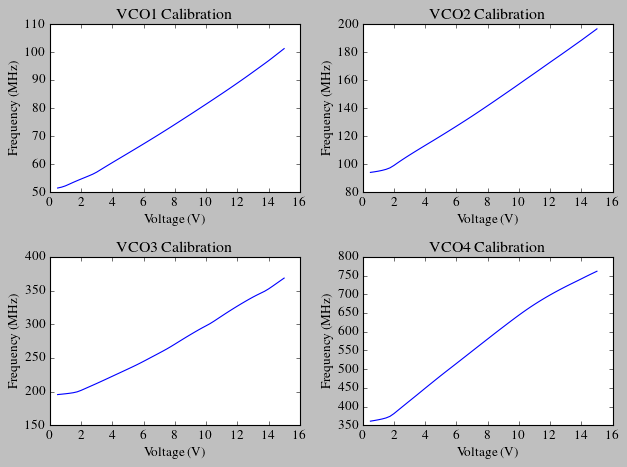

In [73]:
V = np.linspace(0.5,15.0,59)

fig = plt.figure()

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('VCO1 Calibration') # non OOP: plt.title('The function f')
sub1.plot(V,f_VCO1)
sub1.set_xlabel('Voltage (V)')
sub1.set_ylabel('Frequency (MHz)')

sub2 = fig.add_subplot(222)
sub2.set_title('VCO2 Calibration')
sub2.plot(V,f_VCO2)
sub2.set_xlabel('Voltage (V)')
sub2.set_ylabel('Frequency (MHz)')

sub3 = fig.add_subplot(223)
sub3.set_title('VCO3 Calibration')
sub3.plot(V,f_VCO3)
sub3.set_xlabel('Voltage (V)')
sub3.set_ylabel('Frequency (MHz)')

sub4 = fig.add_subplot(224)
sub4.set_title('VCO4 Calibration')
sub4.plot(V,f_VCO4)
sub4.set_xlabel('Voltage (V)')
sub4.set_ylabel('Frequency (MHz)')

plt.tight_layout()
filename = 'VCO_Calibrations_freq_vs_volt.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

# VCO Power Calibration

In [74]:
VCO1_powercal = q.load_data_from_file('vco1_power_cal.txt', '\t')
VCO2_powercal = q.load_data_from_file('vco2_power_cal.txt', '\t')
VCO3_powercal = q.load_data_from_file('vco3_power_cal.txt', '\t')
VCO4_powercal = q.load_data_from_file('vco4_power_cal.txt', '\t')

<ipython-input-76-251af96ed5d7>:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


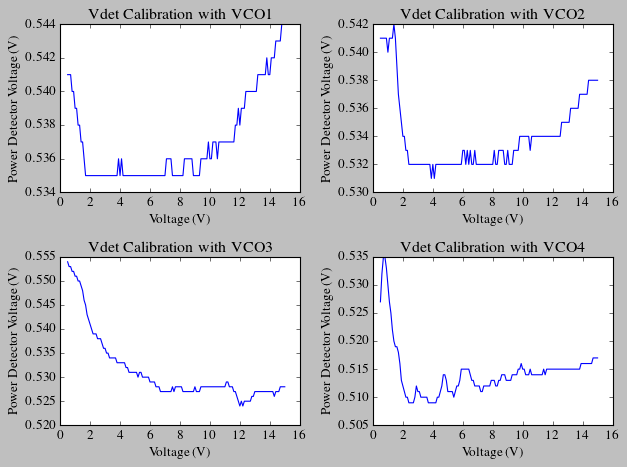

In [76]:
fig = plt.figure()

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Vdet Calibration with VCO1') # non OOP: plt.title('The function f')
sub1.plot(VCO1_powercal[0],VCO1_powercal[1])
sub1.set_xlabel('Voltage (V)')
sub1.set_ylabel('Power Detector Voltage (V)')

sub2 = fig.add_subplot(222)
sub2.set_title('Vdet Calibration with VCO2')
sub2.plot(VCO2_powercal[0],VCO2_powercal[1])
sub2.set_xlabel('Voltage (V)')
sub2.set_ylabel('Power Detector Voltage (V)')

sub3 = fig.add_subplot(223)
sub3.set_title('Vdet Calibration with VCO3')
sub3.plot(VCO3_powercal[0],VCO3_powercal[1])
sub3.set_xlabel('Voltage (V)')
sub3.set_ylabel('Power Detector Voltage (V)')

sub4 = fig.add_subplot(224)
sub4.set_title('Vdet Calibration with VCO4')
sub4.plot(VCO4_powercal[0],VCO4_powercal[1])
sub4.set_xlabel('Voltage (V)')
sub4.set_ylabel('Power Detector Voltage (V)')

plt.tight_layout()
filename = 'Vdet_Calibrations_volt_vs_volt.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

# Different Coaxial Cable Configuration Simulations

In [77]:
import numpy as np

def calculate_reflection_val_at_AB(ZA, ZB):
    r_val = (ZA-ZB)/(ZA+ZB)
    return r_val

def calculate_transmission_val_at_AB(ZA, ZB):
    t_val = (2*ZA)/(ZA+ZB)
    return t_val

def build_transfer_matrix(ZA, ZB):
    r_val = calculate_reflection_val_at_AB(ZA, ZB)
    t_val = calculate_transmission_val_at_AB(ZA, ZB)
    
    T_AB = (1/t_val)*np.matrix([[1,r_val], [r_val, 1]])
    return T_AB

def calculate_phase_shift(Z, vel_percentage, L, f):
    c = 299792458 #m/s
    n = 1/(vel_percentage*0.01)
    phase_velocity = c/n
    phi = (2*np.pi*f*L)/phase_velocity
    return phi

def build_propagation_matrix(Z, phi): 
    P = np.matrix([[np.exp(phi*np.complex(0,1)),0], [0, np.exp(phi*np.complex(0,-1))]])
    return P

def calculate_primary_bandgap(vel_percentage, L_unit):
    c = 299792458 #m/s
    n = 1/(vel_percentage*0.01)
    phase_velocity = c/n
    gap = phase_velocity/(2*L_unit)
    return gap

In [78]:
#A: Alpha Wire-J PN 9059B RG 59 B/U
Z_A = 75 #ohm
L_A = 73.1e-2 #m
vel_percentage_A = 66 #%

#B1: Unknown Brand RG 58 C/U Coaxial Cable
Z_B1 = 50 #ohm
L_B1 = 91.9e-2 #m
vel_percentage_B1 = 66 #%

#B2: POMONA 2249-C-36 RG 58 C/U
Z_B2 = 50 #ohm
L_B2 = 107.9e-2 #m
vel_percentage_B2 = 66 #%

#C: O3554 Amphenol Canada RG 62 A/U 59
Z_C = 93 #ohm
L_C = 157.2e-2 #m
vel_percentage_C = 66 #%

gap_A = calculate_primary_bandgap(vel_percentage_A, L_A+L_B1)
gap_B1 = calculate_primary_bandgap(vel_percentage_B1, L_B1)
gap_B2 = calculate_primary_bandgap(vel_percentage_B2, L_B2)
gap_C = calculate_primary_bandgap(vel_percentage_C, L_C)

print(gap_A/1e6, "MHz")
print(gap_B1/1e6, "MHz")
print(gap_B2/1e6, "MHz")
print(gap_C/1e6, "MHz")


59.9584916 MHz
107.65126348204569 MHz
91.6881474884152 MHz
62.93353125954198 MHz


# Simulation Configurations

S1. B1-A (50-75)

S2. B1-A-B1-A-B1-A (50-75)

S3. 

S4. 

S5. 


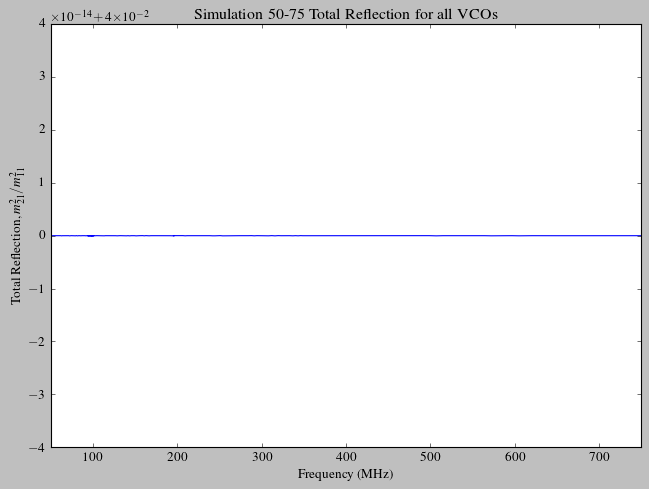

In [95]:
#Config Simulation Config 50-75

f = np.concatenate((f_VCO1,f_VCO2,f_VCO3,f_VCO4))
f = f*1e6 #covert to Hz

R = np.zeros(len(f))

for i, f_in in enumerate(f):
    
    phi_B1 = calculate_phase_shift(Z_B1, vel_percentage_B1, L_B1, f_in)
    P_B1 = build_propagation_matrix(Z_B1, phi_B1)
    
    T_B1A = build_transfer_matrix(Z_B1, Z_A)
    
    phi_A = calculate_phase_shift(Z_A, vel_percentage_A, L_A, f_in)
    P_A = build_propagation_matrix(Z_A, phi_A)

    M_cell = P_A.dot(T_B1A).dot(P_B1)

    R[i] = abs(M_cell[1,0])**2/abs(M_cell[0,0])**2
    #T[i] = 1/abs(M_cell[0,0])**2

plt.plot(f*1e-6, R)
plt.title("Simulation 50-75 Total Reflection for all VCOs")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Total Reflection, $m_{21}^2/m_{11}^2$")
plt.xlim([50, 750])
plt.show()

<ipython-input-192-57b7ee9984f6>:62: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

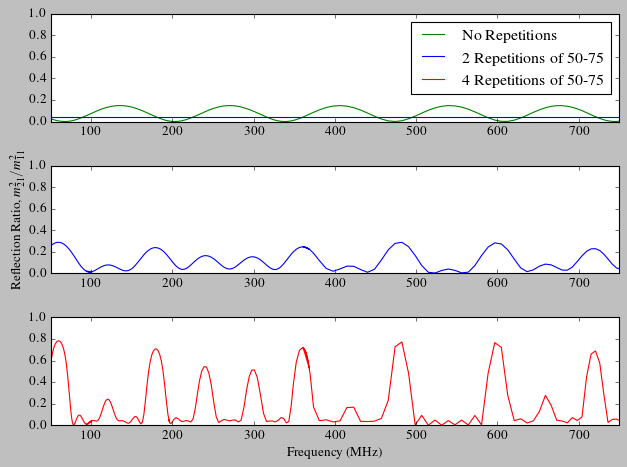

The primary band gap for 50-75 configuration is:  59.9584916 MHz
There will also be resonance at :  119.9169832 239.8339664 359.7509496 479.6679328 MHz


In [192]:
#Config Simulation Config 50-75 Repeated 
#B1: Unknown Brand RG 58 C/U Coaxial Cable
Z_B1 = 50 #ohm
L_B1 = 91.9e-2 #m
vel_percentage_B1 = 66 #%

f = np.concatenate((f_VCO1,f_VCO2,f_VCO3,f_VCO4))
f = f*1e6 #covert to Hz

R_0rep = np.zeros(len(f))
R_1rep = np.zeros(len(f))
R_2rep = np.zeros(len(f))
R_3rep = np.zeros(len(f))
R_4rep = np.zeros(len(f))

for i, f_in in enumerate(f):
    
    phi_B1 = calculate_phase_shift(Z_B1, vel_percentage_B1, L_B1, f_in)
    P_B1 = build_propagation_matrix(Z_B1, phi_B1)
    
    T_B1A = build_transfer_matrix(Z_B1, Z_A)
    
    phi_A = calculate_phase_shift(Z_A, vel_percentage_A, L_A, f_in)
    P_A = build_propagation_matrix(Z_A, phi_A)
    
    T_AB1 = build_transfer_matrix(Z_A, Z_B1)

    M_cell_0rep = P_A.dot(T_AB1).dot(P_B1)
    M_cell_1rep = P_B1.dot(T_AB1).dot(P_A).dot(T_AB1).dot(P_B1)
    M_cell_2rep = P_A.dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1)
    M_cell_3rep = P_A.dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1)
    M_cell_4rep = P_A.dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1)
    
    R_0rep[i] = abs(M_cell_0rep[1,0])**2/abs(M_cell_0rep[0,0])**2
    R_1rep[i] = abs(M_cell_1rep[1,0])**2/abs(M_cell_1rep[0,0])**2
    R_2rep[i] = abs(M_cell_2rep[1,0])**2/abs(M_cell_2rep[0,0])**2
    R_3rep[i] = abs(M_cell_3rep[1,0])**2/abs(M_cell_3rep[0,0])**2
    R_4rep[i] = abs(M_cell_4rep[1,0])**2/abs(M_cell_4rep[0,0])**2

fig1 = plt.figure()

fig1, axs = plt.subplots(3)
#axs[0].set_title('Total Reflection for all VCOs for 50-75 $\Omega$ Simulation Repetitions')
a ,= axs[0].plot(f*1e-6, R_1rep,'-g')
a2 ,= axs[0].plot(f*1e-6, R_0rep,'-b')
b ,= axs[1].plot(f*1e-6, R_2rep)
c ,= axs[2].plot(f*1e-6, R_4rep, '-r')

axs[2].set_xlabel("Frequency (MHz)")
#axs[0].set_ylabel("Reflection Ratio, $m_{21}^2/m_{11}^2$")
axs[1].set_ylabel("Reflection Ratio, $m_{21}^2/m_{11}^2$")
#axs[2].set_ylabel("Reflection Ratio, $m_{21}^2/m_{11}^2$")
axs[1].set_xlim([50, 750])
axs[2].set_ylim([0, 1])
axs[2].set_xlim([50, 750])
axs[1].set_ylim([0, 1])
axs[0].set_xlim([50, 750])
axs[0].set_ylim([0, 1])

axs[0].legend([a, b, c],['No Repetitions','2 Repetitions of 50-75','4 Repetitions of 50-75'],loc='upper right')

plt.tight_layout()
filename = 'ExecSum_Simulations_50-75.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

primary_gap = calculate_primary_bandgap(vel_percentage_A, L_A+L_B1)
print("The primary band gap for 50-75 configuration is: ", primary_gap/1e6, "MHz")
print("There will also be resonance at : ", primary_gap*2/1e6,primary_gap*4/1e6,primary_gap*6/1e6,primary_gap*8/1e6, "MHz")

<ipython-input-182-12208b015d3f>:52: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

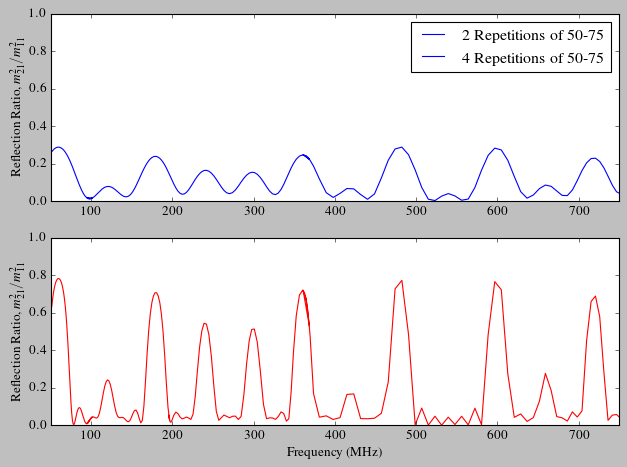

The primary band gap for 50-75 configuration is:  59.9584916 MHz
There will also be resonance at :  119.9169832 239.8339664 359.7509496 479.6679328 MHz


In [182]:
#Simulation Config 2 50-75

f = np.concatenate((f_VCO1,f_VCO2,f_VCO3,f_VCO4))
f = f*1e6 #covert to Hz

R_2rep = np.zeros(len(f))
R_3rep = np.zeros(len(f))
R_4rep = np.zeros(len(f))

for i, f_in in enumerate(f):
    
    phi_B1 = calculate_phase_shift(Z_B1, vel_percentage_B1, L_B1, f_in)
    P_B1 = build_propagation_matrix(Z_B1, phi_B1)
    
    T_B1A = build_transfer_matrix(Z_B1, Z_A)
    
    phi_A = calculate_phase_shift(Z_A, vel_percentage_A, L_A, f_in)
    P_A = build_propagation_matrix(Z_A, phi_A)
    
    T_AB1 = build_transfer_matrix(Z_A, Z_B1)

    M_cell_2rep = P_A.dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1)
    M_cell_3rep = P_A.dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1)
    M_cell_4rep = P_A.dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1).dot(T_B1A).dot(P_A).dot(T_AB1).dot(P_B1)
    
    R_2rep[i] = abs(M_cell_2rep[1,0])**2/abs(M_cell_2rep[0,0])**2
    R_3rep[i] = abs(M_cell_3rep[1,0])**2/abs(M_cell_3rep[0,0])**2
    R_4rep[i] = abs(M_cell_4rep[1,0])**2/abs(M_cell_4rep[0,0])**2

fig1 = plt.figure()

fig1, axs = plt.subplots(2)
#axs[0].set_title('Total Reflection for all VCOs for 50-75 $\Omega$ Simulation Repetitions')
a ,= axs[0].plot(f*1e-6, R_2rep)
axs[0].legend([a, b],['2 Repetitions of 50-75','4 Repetitions of 50-75'],loc='upper right')
b ,= axs[1].plot(f*1e-6, R_4rep, '-r')

axs[1].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Reflection Ratio, $m_{21}^2/m_{11}^2$")
axs[1].set_ylabel("Reflection Ratio, $m_{21}^2/m_{11}^2$")
axs[0].set_xlim([50, 750])
axs[1].set_ylim([0, 1])
axs[1].set_xlim([50, 750])
axs[0].set_ylim([0, 1])

#axs[0].set_title("2 Repetitions")

plt.tight_layout()
filename = 'Simulation_50-75.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

primary_gap = calculate_primary_bandgap(vel_percentage_A, L_A+L_B1)
print("The primary band gap for 50-75 configuration is: ", primary_gap/1e6, "MHz")
print("There will also be resonance at : ", primary_gap*2/1e6,primary_gap*4/1e6,primary_gap*6/1e6,primary_gap*8/1e6, "MHz")

<ipython-input-175-65d3ea4a9454>:51: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

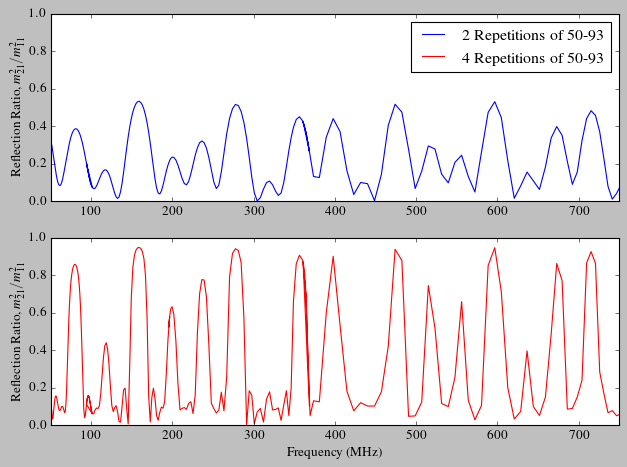

The primary band gap for 50-75 configuration is:  39.71558054596548 MHz
There will also be resonance at :  79.43116109193096 158.86232218386192 238.29348327579288 317.72464436772384 MHz


In [175]:
#Simulation Config 50-93
#B1: Unknown Brand RG 58 C/U Coaxial Cable
Z_B1 = 50 #ohm
L_B1 = 91.9e-2 #m
vel_percentage_B1 = 66 #%

f = np.concatenate((f_VCO1,f_VCO2,f_VCO3,f_VCO4))
f = f*1e6 #covert to Hz

R_2rep = np.zeros(len(f))
R_3rep = np.zeros(len(f))
R_4rep = np.zeros(len(f))

for i, f_in in enumerate(f):
    
    phi_B1 = calculate_phase_shift(Z_B1, vel_percentage_B1, L_B1, f_in)
    P_B1 = build_propagation_matrix(Z_B1, phi_B1)
    
    T_B1C = build_transfer_matrix(Z_B1, Z_C)
    
    phi_C = calculate_phase_shift(Z_C, vel_percentage_C, L_C, f_in)
    P_C = build_propagation_matrix(Z_C, phi_C)
    
    T_CB1 = build_transfer_matrix(Z_C, Z_B1)

    M_cell_2rep = P_C.dot(T_CB1).dot(P_B1).dot(T_B1C).dot(P_C).dot(T_CB1).dot(P_B1)
    M_cell_3rep = P_C.dot(T_CB1).dot(P_B1).dot(T_B1C).dot(P_C).dot(T_CB1).dot(P_B1).dot(T_B1C).dot(P_C).dot(T_CB1).dot(P_B1)
    M_cell_4rep = P_C.dot(T_CB1).dot(P_B1).dot(T_B1C).dot(P_C).dot(T_CB1).dot(P_B1).dot(T_B1C).dot(P_C).dot(T_CB1).dot(P_B1).dot(T_B1C).dot(P_C).dot(T_CB1).dot(P_B1)
    
    R_2rep[i] = abs(M_cell_2rep[1,0])**2/abs(M_cell_2rep[0,0])**2
    R_3rep[i] = abs(M_cell_3rep[1,0])**2/abs(M_cell_3rep[0,0])**2
    R_4rep[i] = abs(M_cell_4rep[1,0])**2/abs(M_cell_4rep[0,0])**2

fig1 = plt.figure()

fig1, axs = plt.subplots(2)
#fig1.suptitle('Total Reflection for all VCOs for 50-93 $\Omega$ Simulation Repetitions')
a ,= axs[0].plot(f*1e-6, R_2rep)
b ,= axs[1].plot(f*1e-6, R_4rep, '-r')

axs[1].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Reflection Ratio, $m_{21}^2/m_{11}^2$")
axs[1].set_ylabel("Reflection Ratio, $m_{21}^2/m_{11}^2$")
axs[0].set_xlim([50, 750])
axs[1].set_ylim([0, 1])
axs[1].set_xlim([50, 750])
axs[0].set_ylim([0, 1])
axs[0].legend([a, b],['2 Repetitions of 50-93','4 Repetitions of 50-93'])
#axs[0].set_title("2 Repetitions")

plt.tight_layout()
filename = 'Simulation_50-93.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

primary_gap = calculate_primary_bandgap(vel_percentage_A, L_C+L_B1)
print("The primary band gap for 50-75 configuration is: ", primary_gap/1e6, "MHz")
print("There will also be resonance at : ", primary_gap*2/1e6,primary_gap*4/1e6,primary_gap*6/1e6,primary_gap*8/1e6, "MHz")

<ipython-input-176-ad11938cda89>:58: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

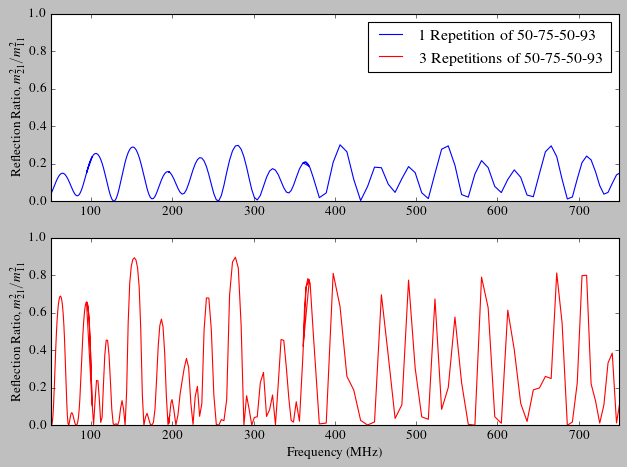

The primary band gap for 50-75 configuration is:  23.890729567737264 MHz
There will also be resonance at :  47.78145913547453 95.56291827094905 143.34437740642358 191.1258365418981 MHz


In [176]:
#Simulation Config 50-75-50-93
#B1: Unknown Brand RG 58 C/U Coaxial Cable
Z_B1 = 50 #ohm
L_B1 = 91.9e-2 #m
vel_percentage_B1 = 66 #%

f = np.concatenate((f_VCO1,f_VCO2,f_VCO3,f_VCO4))
f = f*1e6 #covert to Hz

R_1rep = np.zeros(len(f))
R_2rep = np.zeros(len(f))
R_3rep = np.zeros(len(f))

for i, f_in in enumerate(f):
    
    phi_B1 = calculate_phase_shift(Z_B1, vel_percentage_B1, L_B1, f_in)
    P_B1 = build_propagation_matrix(Z_B1, phi_B1)
    
    T_B1A = build_transfer_matrix(Z_B1, Z_A)
    
    phi_A = calculate_phase_shift(Z_A, vel_percentage_A, L_A, f_in)
    P_A = build_propagation_matrix(Z_A, phi_A)
    
    T_AC = build_transfer_matrix(Z_A, Z_C)
    
    phi_C = calculate_phase_shift(Z_C, vel_percentage_C, L_C, f_in)
    P_C = build_propagation_matrix(Z_C, phi_C)
    
    T_CB1 = build_transfer_matrix(Z_C, Z_B1)

    M_cell_1rep = P_B1.dot(T_CB1).dot(P_C).dot(T_AC).dot(P_A).dot(T_B1A).dot(P_B1)
    M_cell_2rep = P_B1.dot(T_CB1).dot(P_C).dot(T_AC).dot(P_A).dot(T_B1A).dot(P_B1).dot(T_CB1).dot(P_C).dot(T_AC).dot(P_A).dot(T_B1A).dot(P_B1)
    M_cell_3rep = P_B1.dot(T_CB1).dot(P_C).dot(T_AC).dot(P_A).dot(T_B1A).dot(P_B1).dot(T_CB1).dot(P_C).dot(T_AC).dot(P_A).dot(T_B1A).dot(P_B1).dot(T_CB1).dot(P_C).dot(T_AC).dot(P_A).dot(T_B1A).dot(P_B1)
    
    R_1rep[i] = abs(M_cell_1rep[1,0])**2/abs(M_cell_1rep[0,0])**2
    R_2rep[i] = abs(M_cell_2rep[1,0])**2/abs(M_cell_2rep[0,0])**2
    R_3rep[i] = abs(M_cell_3rep[1,0])**2/abs(M_cell_3rep[0,0])**2

fig1 = plt.figure()

fig1, axs = plt.subplots(2)
#fig1.suptitle('Total Reflection for all VCOs for 50-75-50-93 $\Omega$ Simulation Repetitions')
a ,= axs[0].plot(f*1e-6, R_1rep)
axs[0].legend([a, b],['1 Repetition of 50-75-50-93','3 Repetitions of 50-75-50-93'],loc='upper right')
b ,= axs[1].plot(f*1e-6, R_3rep, '-r')


axs[1].set_xlabel("Frequency (MHz)")
axs[0].set_ylabel("Reflection Ratio, $m_{21}^2/m_{11}^2$")
axs[1].set_ylabel("Reflection Ratio, $m_{21}^2/m_{11}^2$")
axs[0].set_xlim([50, 750])
axs[1].set_ylim([0, 1])
axs[1].set_xlim([50, 750])
axs[0].set_ylim([0, 1])

#axs[0].set_title("2 Repetitions")

plt.tight_layout()
filename = 'Simulation_50-75-50-93.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

primary_gap = calculate_primary_bandgap(vel_percentage_A, L_B1+L_A+L_B1+L_C)
print("The primary band gap for 50-75 configuration is: ", primary_gap/1e6, "MHz")
print("There will also be resonance at : ", primary_gap*2/1e6,primary_gap*4/1e6,primary_gap*6/1e6,primary_gap*8/1e6, "MHz")

# Experimental Configuration Simulations
1. A (75)
2. B1-A-B2 (50-75-50)
3. B1-C-B2 (50-93-50)
4. A-C-A (75-93-75)
5. A-B1-C (75-50-93)

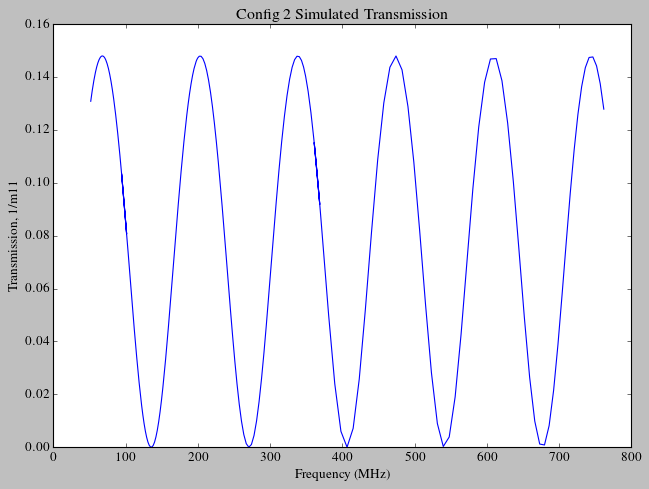

In [207]:
#Config 2 simulation

f = np.concatenate((f_VCO1,f_VCO2,f_VCO3,f_VCO4))
f = f*1e6 #covert to Hz

R = np.zeros(len(f))
phi_B1 = np.zeros(len(f))

for i, f_in in enumerate(f):
    
    phi_B1[i] = calculate_phase_shift(Z_B1, vel_percentage_B1, L_B1, f_in)
    P_B1 = build_propagation_matrix(Z_B1, phi_B1[i])

    T_B1A = build_transfer_matrix(Z_B1, Z_A)

    phi_A = calculate_phase_shift(Z_A, vel_percentage_A, L_A, f_in)
    P_A = build_propagation_matrix(Z_A, phi_A)
    
    T_AB2 = build_transfer_matrix(Z_A, Z_B2)

    phi_B2 = calculate_phase_shift(Z_B2, vel_percentage_B2, L_B2, f_in)
    P_B2 = build_propagation_matrix(Z_B2, phi_B2)

    M_cell = P_B2.dot(T_AB2).dot(P_A).dot(T_B1A).dot(P_B1)

    R[i] = abs(M_cell[1,0])**2/abs(M_cell[0,0])**2
    #R[i] = 1/abs(M_cell[0,0])**2

plt.plot(f*1e-6, R)
plt.title("Config 2 Simulated Transmission")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Transmission, 1/m11")
plt.show()


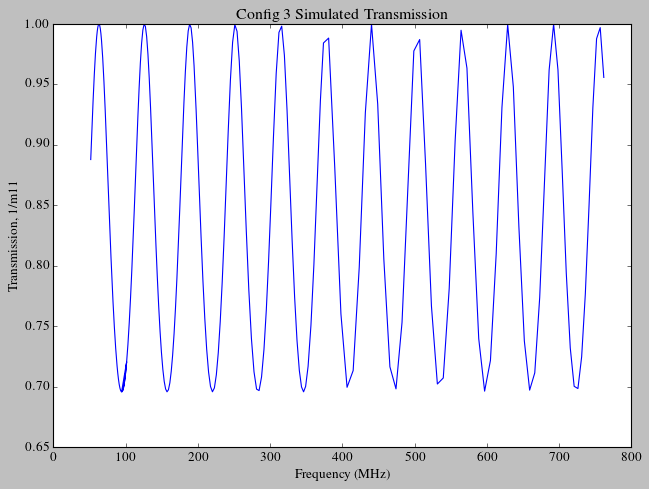

In [206]:
#Config 3 simulation

f = np.concatenate((f_VCO1,f_VCO2,f_VCO3,f_VCO4))
f = f*1e6 #covert to Hz

R = np.zeros(len(f))
phi_B1 = np.zeros(len(f))

for i, f_in in enumerate(f):
    
    phi_B1[i] = calculate_phase_shift(Z_B1, vel_percentage_B1, L_B1, f_in)
    P_B1 = build_propagation_matrix(Z_B1, phi_B1[i])

    T_B1C = build_transfer_matrix(Z_B1, Z_C)

    phi_C = calculate_phase_shift(Z_C, vel_percentage_C, L_C, f_in)
    P_C = build_propagation_matrix(Z_C, phi_C)
    
    T_CB2 = build_transfer_matrix(Z_C, Z_B2)

    phi_B2 = calculate_phase_shift(Z_B2, vel_percentage_B2, L_B2, f_in)
    P_B2 = build_propagation_matrix(Z_B2, phi_B2)

    M_cell = P_B2.dot(T_CB2).dot(P_C).dot(T_B1C).dot(P_B1)

    #R[i] = abs(M_cell[1,0])**2/abs(M_cell[0,0])**2
    R[i] = 1/abs(M_cell[0,0])**2

plt.plot(f*1e-6, R)
plt.title("Config 3 Simulated Transmission")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Transmission, 1/m11")
plt.show()


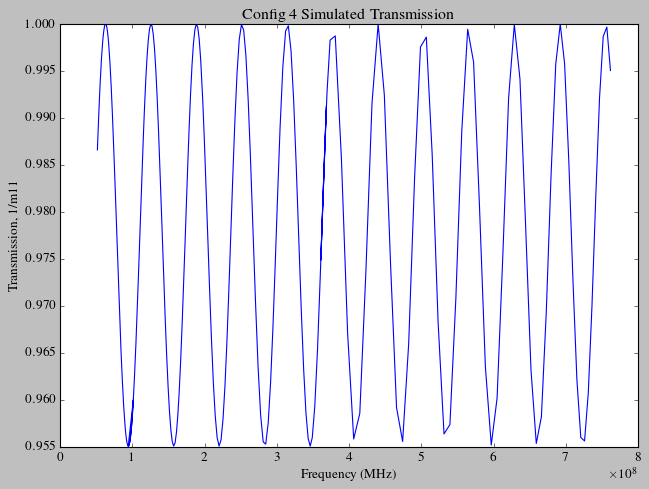

In [203]:
#Config 4 simulation

f = np.concatenate((f_VCO1,f_VCO2,f_VCO3,f_VCO4))
f = f*1e6 #covert to Hz

R = np.zeros(len(f))
T = np.zeros(len(f))

for i, f_in in enumerate(f):
    
    phi_A = calculate_phase_shift(Z_A, vel_percentage_A, L_A, f_in)
    P_A = build_propagation_matrix(Z_A, phi_A)

    T_AC = build_transfer_matrix(Z_A, Z_C)

    phi_C = calculate_phase_shift(Z_C, vel_percentage_C, L_C, f_in)
    P_C = build_propagation_matrix(Z_C, phi_C)
    
    T_CA = build_transfer_matrix(Z_C, Z_A)

    phi_A = calculate_phase_shift(Z_A, vel_percentage_A, L_A, f_in)
    P_A = build_propagation_matrix(Z_A, phi_A)

    M_cell = P_A.dot(T_CA).dot(P_C).dot(T_AC).dot(P_A)

    #R[i] = abs(M_cell[1,0])**2/abs(M_cell[0,0])**2
    T[i] = 1/abs(M_cell[0,0])**2

plt.plot(f, T)
plt.title("Config 4 Simulated Transmission")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Transmission, 1/m11")
plt.show()

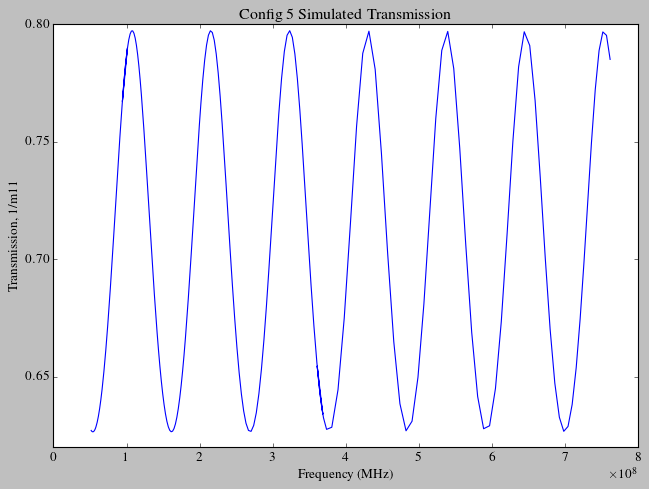

In [200]:
#Config 5 simulation

f = np.concatenate((f_VCO1,f_VCO2,f_VCO3,f_VCO4))
f = f*1e6 #covert to Hz

R = np.zeros(len(f))
T = np.zeros(len(f))

for i, f_in in enumerate(f):
    
    phi_A = calculate_phase_shift(Z_A, vel_percentage_A, L_A, f_in)
    P_A = build_propagation_matrix(Z_A, phi_A)

    T_AB1 = build_transfer_matrix(Z_A, Z_B1)

    phi_B1 = calculate_phase_shift(Z_B1, vel_percentage_B1, L_B1, f_in)
    P_B1 = build_propagation_matrix(Z_B1, phi_B1)
    
    T_B1C = build_transfer_matrix(Z_B1, Z_C)

    phi_C = calculate_phase_shift(Z_C, vel_percentage_C, L_C, f_in)
    P_C = build_propagation_matrix(Z_C, phi_C)

    M_cell = P_A.dot(T_AB1).dot(P_B1).dot(T_B1C).dot(P_C)

    R[i] = abs(M_cell[1,0])**2/abs(M_cell[0,0])**2
    T[i] = 1/abs(M_cell[0,0])**2

plt.plot(f, T)
plt.title("Config 5 Simulated Transmission")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Transmission, 1/m11")
plt.show()

# Experimental Configuration Data

In [51]:
SAVEFIG = 1

# Define graphing parameters
from matplotlib import rc
plt.style.use('classic')
plt.rcParams['font.size'] = 12
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [52]:
VCO1_config1 = q.load_data_from_file('PHC_data/vco1_conf1.txt', '\t')
VCO2_config1 = q.load_data_from_file('PHC_data/vco2_conf1.txt', '\t')
VCO3_config1 = q.load_data_from_file('PHC_data/vco3_conf1.txt', '\t')
VCO4_config1 = q.load_data_from_file('PHC_data/vco4_conf1.txt', '\t')

VCO1_config2 = q.load_data_from_file('PHC_data/vco1_conf2.txt', '\t')
VCO2_config2 = q.load_data_from_file('PHC_data/vco2_conf2.txt', '\t')
VCO3_config2 = q.load_data_from_file('PHC_data/vco3_conf2.txt', '\t')
VCO4_config2 = q.load_data_from_file('PHC_data/vco4_conf2.txt', '\t')

VCO1_config3 = q.load_data_from_file('PHC_data/vco1_conf3.txt', '\t')
VCO2_config3 = q.load_data_from_file('PHC_data/vco2_conf3.txt', '\t')
VCO3_config3 = q.load_data_from_file('PHC_data/vco3_conf3.txt', '\t')
VCO4_config3 = q.load_data_from_file('PHC_data/vco4_conf3.txt', '\t')

VCO1_config4 = q.load_data_from_file('PHC_data/vco1_conf4.txt', '\t')
VCO2_config4 = q.load_data_from_file('PHC_data/vco2_conf4.txt', '\t')
VCO3_config4 = q.load_data_from_file('PHC_data/vco3_conf4.txt', '\t')
VCO4_config4 = q.load_data_from_file('PHC_data/vco4_conf4.txt', '\t')

VCO1_config5 = q.load_data_from_file('PHC_data/vco1_conf5.txt', '\t')
VCO2_config5 = q.load_data_from_file('PHC_data/vco2_conf5.txt', '\t')
VCO3_config5 = q.load_data_from_file('PHC_data/vco3_conf5.txt', '\t')
VCO4_config5 = q.load_data_from_file('PHC_data/vco4_conf5.txt', '\t')

In [53]:
#Interpolate frequency calibration data
f1 = interp1d(V, f_VCO1, kind = 'cubic')
xnew1 = np.linspace(V[0], V[-1],len(VCO1_config1[0]))
f_VCO1_interp = f1(xnew1)

f2 = interp1d(V, f_VCO2, kind = 'cubic')
xnew1 = np.linspace(V[0], V[-1],len(VCO1_config2[0]))
f_VCO2_interp = f2(xnew1)

f3 = interp1d(V, f_VCO3, kind = 'cubic')
xnew1 = np.linspace(V[0], V[-1],len(VCO1_config3[0]))
f_VCO3_interp = f3(xnew1)

f4 = interp1d(V, f_VCO4, kind = 'cubic')
xnew1 = np.linspace(V[0], V[-1],len(VCO1_config4[0]))
f_VCO4_interp = f4(xnew1)


<ipython-input-208-6386fb2f5f2d>:33: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


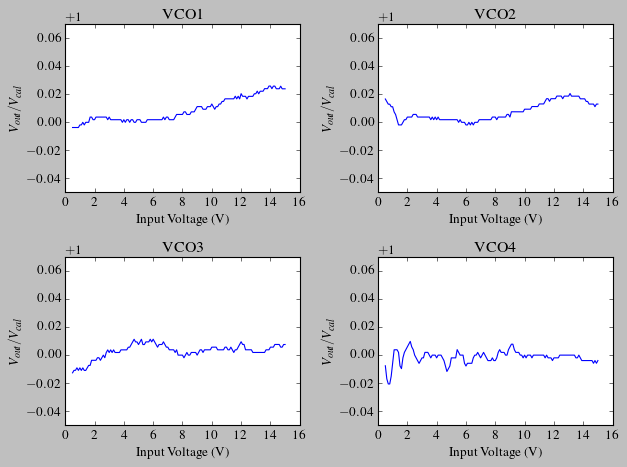

In [208]:
#CONFIG 1 - Voltage vs Voltage

fig = plt.figure()

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('VCO1') # non OOP: plt.title('The function f')
sub1.plot(VCO1_config1[0],VCO1_config1[1]/VCO1_powercal[1])
sub1.set_xlabel("Input Voltage (V)")
sub1.set_ylabel("$V_{out}/V_{cal}$")
sub1.set_ylim([0.95, 1.07])

sub2 = fig.add_subplot(222)
sub2.set_title('VCO2')
sub2.plot(VCO2_config1[0],VCO2_config1[1]/VCO2_powercal[1])
sub2.set_xlabel("Input Voltage (V)")
sub2.set_ylabel("$V_{out}/V_{cal}$")
sub2.set_ylim([0.95, 1.07])

sub3 = fig.add_subplot(223)
sub3.set_title('VCO3')
sub3.plot(VCO3_config1[0],VCO3_config1[1]/VCO3_powercal[1])
sub3.set_xlabel("Input Voltage (V)")
sub3.set_ylabel("$V_{out}/V_{cal}$")
sub3.set_ylim([0.95, 1.07])

sub4 = fig.add_subplot(224)
sub4.set_title('VCO4')
sub4.plot(VCO4_config1[0],VCO4_config1[1]/VCO4_powercal[1])
sub4.set_xlabel("Input Voltage (V)")
sub4.set_ylabel("$V_{out}/V_{cal}$")
sub4.set_ylim([0.95, 1.07])

plt.tight_layout()
plt.show()

<ipython-input-58-63157df4a614>:37: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


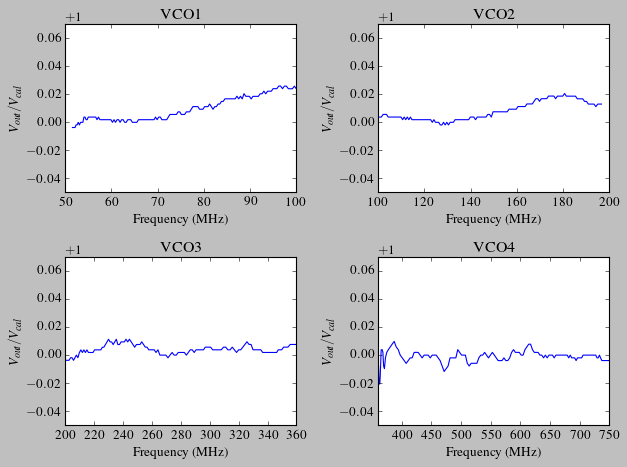

In [58]:
#CONFIG 1 - Interpolated frequencies

fig = plt.figure()

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('VCO1') # non OOP: plt.title('The function f')
sub1.plot(f_VCO1_interp,VCO1_config1[1]/VCO1_powercal[1])
sub1.set_xlabel('Frequency (MHz)')
sub1.set_ylabel("$V_{out}/V_{cal}$")
sub1.set_ylim([0.95, 1.07])
sub1.set_xlim([50, 100])

sub2 = fig.add_subplot(222)
sub2.set_title('VCO2')
sub2.plot(f_VCO2_interp,VCO2_config1[1]/VCO2_powercal[1])
sub2.set_xlabel('Frequency (MHz)')
sub2.set_ylabel("$V_{out}/V_{cal}$")
sub2.set_ylim([0.95, 1.07])
sub2.set_xlim([100, 200])

sub3 = fig.add_subplot(223)
sub3.set_title('VCO3')
sub3.plot(f_VCO3_interp,VCO3_config1[1]/VCO3_powercal[1])
sub3.set_xlabel('Frequency (MHz)')
sub3.set_ylabel("$V_{out}/V_{cal}$")
sub3.set_ylim([0.95, 1.07])
sub3.set_xlim([200, 360])

sub4 = fig.add_subplot(224)
sub4.set_title('VCO4')
sub4.plot(f_VCO4_interp,VCO4_config1[1]/VCO4_powercal[1])
sub4.set_xlabel('Frequency (MHz)')
sub4.set_ylabel("$V_{out}/V_{cal}$")
sub4.set_ylim([0.95, 1.07])
sub4.set_xlim([360, 750])

plt.tight_layout()
filename = 'Config1_ratio_vs_freq.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

<ipython-input-61-be39cb937242>:43: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


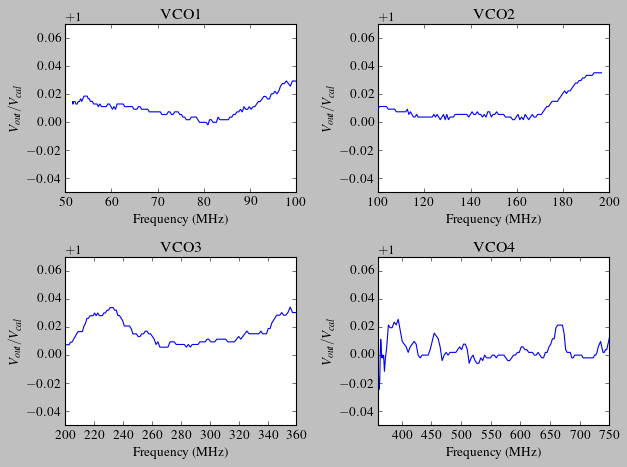

In [61]:
#CONFIG 2 - Interpolated frequencies

fig = plt.figure()

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('VCO1') # non OOP: plt.title('The function f')
sub1.plot(f_VCO1_interp,VCO1_config2[1]/VCO1_powercal[1])
sub1.set_xlabel('Frequency (MHz)')
sub1.set_ylabel("$V_{out}/V_{cal}$")
sub1.set_ylim([0.95, 1.07])

sub2 = fig.add_subplot(222)
sub2.set_title('VCO2')
sub2.plot(f_VCO2_interp,VCO2_config2[1]/VCO2_powercal[1])
sub2.set_xlabel('Frequency (MHz)')
sub2.set_ylabel("$V_{out}/V_{cal}$")
sub2.set_ylim([0.95, 1.07])

sub3 = fig.add_subplot(223)
sub3.set_title('VCO3')
sub3.plot(f_VCO3_interp,VCO3_config2[1]/VCO3_powercal[1])
sub3.set_xlabel('Frequency (MHz)')
sub3.set_ylabel("$V_{out}/V_{cal}$")
sub3.set_ylim([0.95, 1.07])

sub4 = fig.add_subplot(224)
sub4.set_title('VCO4')
sub4.plot(f_VCO4_interp,VCO4_config2[1]/VCO4_powercal[1])
sub4.set_xlabel('Frequency (MHz)')
sub4.set_ylabel("$V_{out}/V_{cal}$")
sub4.set_ylim([0.95, 1.07])

sub1.set_ylabel("$V_{out}/V_{cal}$")
sub2.set_ylabel("$V_{out}/V_{cal}$")
sub3.set_ylabel("$V_{out}/V_{cal}$")
sub4.set_ylabel("$V_{out}/V_{cal}$")

sub1.set_xlim([50, 100])
sub2.set_xlim([100, 200])
sub3.set_xlim([200, 360])
sub4.set_xlim([360, 750])

plt.tight_layout()
filename = 'Config2_ratio_vs_freq.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

<ipython-input-64-2dff05eb61bf>:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


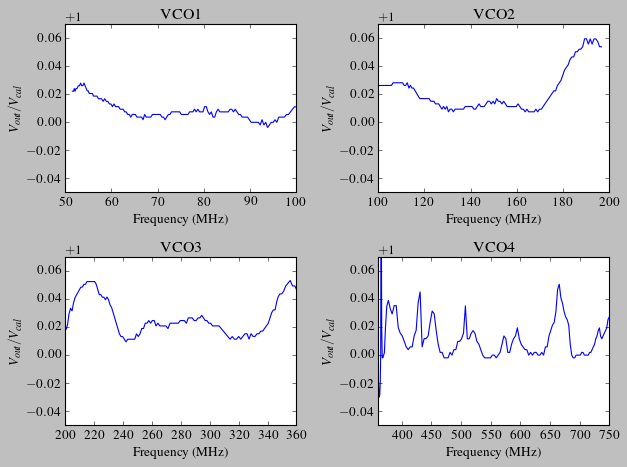

In [64]:
#CONFIG 3 - Interpolated frequencies

fig = plt.figure()

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('VCO1') # non OOP: plt.title('The function f')
sub1.plot(f_VCO1_interp,VCO1_config3[1]/VCO1_powercal[1])
sub1.set_xlabel('Frequency (MHz)')
sub1.set_ylim([0.95, 1.07])

sub2 = fig.add_subplot(222)
sub2.set_title('VCO2')
sub2.plot(f_VCO2_interp,VCO2_config3[1]/VCO2_powercal[1])
sub2.set_xlabel('Frequency (MHz)')
sub2.set_ylim([0.95, 1.07])

sub3 = fig.add_subplot(223)
sub3.set_title('VCO3')
sub3.plot(f_VCO3_interp,VCO3_config3[1]/VCO3_powercal[1])
sub3.set_xlabel('Frequency (MHz)')
sub3.set_ylim([0.95, 1.07])

sub4 = fig.add_subplot(224)
sub4.set_title('VCO4')
sub4.plot(f_VCO4_interp,VCO4_config3[1]/VCO4_powercal[1])
sub4.set_xlabel('Frequency (MHz)')
sub4.set_ylim([0.95, 1.07])

sub1.set_ylabel("$V_{out}/V_{cal}$")
sub2.set_ylabel("$V_{out}/V_{cal}$")
sub3.set_ylabel("$V_{out}/V_{cal}$")
sub4.set_ylabel("$V_{out}/V_{cal}$")

sub1.set_xlim([50, 100])
sub2.set_xlim([100, 200])
sub3.set_xlim([200, 360])
sub4.set_xlim([360, 750])

plt.tight_layout()
filename = 'Config3_ratio_vs_freq.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

<ipython-input-65-78b9e6b9ef79>:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


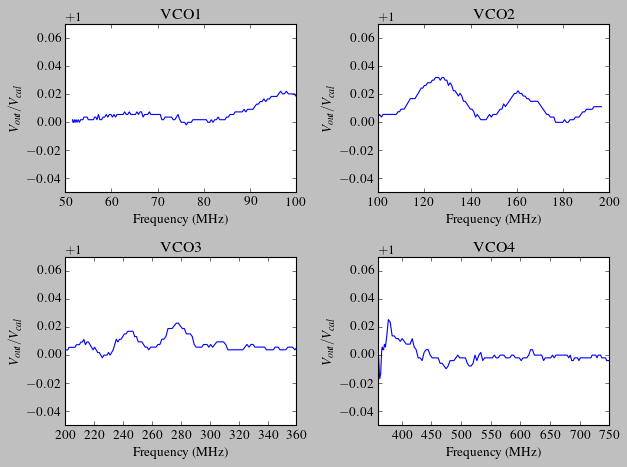

In [65]:
#CONFIG 4 - Interpolated frequencies

fig = plt.figure()

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('VCO1') # non OOP: plt.title('The function f')
sub1.plot(f_VCO1_interp,VCO1_config4[1]/VCO1_powercal[1])
sub1.set_xlabel('Frequency (MHz)')
sub1.set_ylim([0.95, 1.07])

sub2 = fig.add_subplot(222)
sub2.set_title('VCO2')
sub2.plot(f_VCO2_interp,VCO2_config4[1]/VCO2_powercal[1])
sub2.set_xlabel('Frequency (MHz)')
sub2.set_ylim([0.95, 1.07])

sub3 = fig.add_subplot(223)
sub3.set_title('VCO3')
sub3.plot(f_VCO3_interp,VCO3_config4[1]/VCO3_powercal[1])
sub3.set_xlabel('Frequency (MHz)')
sub3.set_ylim([0.95, 1.07])

sub4 = fig.add_subplot(224)
sub4.set_title('VCO4')
sub4.plot(f_VCO4_interp,VCO4_config4[1]/VCO4_powercal[1])
sub4.set_xlabel('Frequency (MHz)')
sub4.set_ylim([0.95, 1.07])

sub1.set_ylabel("$V_{out}/V_{cal}$")
sub2.set_ylabel("$V_{out}/V_{cal}$")
sub3.set_ylabel("$V_{out}/V_{cal}$")
sub4.set_ylabel("$V_{out}/V_{cal}$")

sub1.set_xlim([50, 100])
sub2.set_xlim([100, 200])
sub3.set_xlim([200, 360])
sub4.set_xlim([360, 750])

plt.tight_layout()
filename = 'Config4_ratio_vs_freq.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()

<ipython-input-66-49a2bf1aa6ec>:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


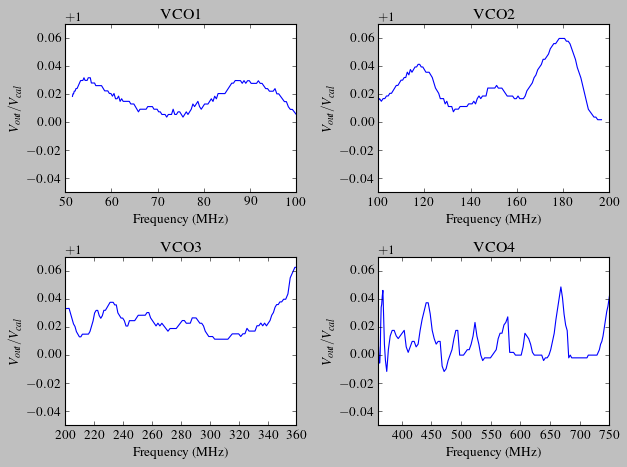

In [66]:
#CONFIG 5 - Interpolated frequencies

fig = plt.figure()

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('VCO1') # non OOP: plt.title('The function f')
sub1.plot(f_VCO1_interp,VCO1_config5[1]/VCO1_powercal[1])
sub1.set_xlabel('Frequency (MHz)')
sub1.set_ylim([0.95, 1.07])

sub2 = fig.add_subplot(222)
sub2.set_title('VCO2')
sub2.plot(f_VCO2_interp,VCO2_config5[1]/VCO2_powercal[1])
sub2.set_xlabel('Frequency (MHz)')
sub2.set_ylim([0.95, 1.07])

sub3 = fig.add_subplot(223)
sub3.set_title('VCO3')
sub3.plot(f_VCO3_interp,VCO3_config5[1]/VCO3_powercal[1])
sub3.set_xlabel('Frequency (MHz)')
sub3.set_ylim([0.95, 1.07])

sub4 = fig.add_subplot(224)
sub4.set_title('VCO4')
sub4.plot(f_VCO4_interp,VCO4_config5[1]/VCO4_powercal[1])
sub4.set_xlabel('Frequency (MHz)')
sub4.set_ylim([0.95, 1.07])

sub1.set_ylabel("$V_{out}/V_{cal}$")
sub2.set_ylabel("$V_{out}/V_{cal}$")
sub3.set_ylabel("$V_{out}/V_{cal}$")
sub4.set_ylabel("$V_{out}/V_{cal}$")

sub1.set_xlim([50, 100])
sub2.set_xlim([100, 200])
sub3.set_xlim([200, 360])
sub4.set_xlim([360, 750])

plt.tight_layout()
filename = 'Config5_ratio_vs_freq.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('PHC_output', filename), format='png', dpi=300)

plt.show()